# Install and Import Library

In [1]:
!pip install wordcloud-fa
!pip install gensim

     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 368kB 48.7MB/s 
     |████████████████████████████████| 317kB 60.3MB/s 
     |████████████████████████████████| 1.4MB 51.0MB/s 
     |████████████████████████████████| 235kB 42.1MB/s 
  Created wheel for wordcloud-fa: filename=wordcloud_fa-0.1.8-cp36-none-any.whl size=71016 sha256=3751881b8220aaf3f94c53c8db3c8db9e84ac9640f77225fc6550ac9675e0dbc
  Stored in directory: /root/.cache/pip/wheels/37/dd/e9/d6d14e3faa089ffa1bc80ae6f713ca91d2ffd0bb786edcdef5
  Created wheel for arabic-reshaper: filename=arabic_reshaper-2.1.1-cp36-none-any.whl size=16504 sha256=10a79bfcbf677a831ac734af08b60103ce71934ff0b055ea087bdd0ad32a9a1c
  Stored in directory: /root/.cache/pip/wheels/62/52/d8/bd0dcbf00f9e77e3bd0184285ed77dfa9c475dac494a5353d1
  Created wheel for nltk: filename=nltk-3.3-cp36-none-any.whl size=1394472 sha256=7448b74c04d193dc00a74a1e6e4b771b9d09825ceee938af9be4395c8b89c640
  Stored in directory: /root/

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
# from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dropout,Embedding,GlobalMaxPooling1D, MaxPooling1D, Add, Flatten

import re
print("Tensorflow Version",tf.__version__)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Tensorflow Version 2.4.1


# Load dataset
This dataset Mixed from multi datasets: ..... more details salam!

In [3]:
# df = pd.read_excel('/content/drive/MyDrive/MasterThesis/DataSet-forUsing/7-offDSA2020-dev-train-8000.xlsx')
df = pd.read_excel('/content/drive/MyDrive/MasterThesis/DataSet-forUsing/7-offDSA2020-dev-train-8000-MixWithNuhaDS1.xlsx')
df.head()

,tweets,off,hs,new-label
0,فى حاجات مينفعش نلفت نظركوا ليها زى الاصول كده...,NOT_OFF,NOT_HS,not-hate
1,RT @USER: وعيون تنادينا تحايل فينا و نقول يا ع...,NOT_OFF,NOT_HS,not-hate
2,يا بلادي يا أم البلاد يا بلادي بحبك يا مصر بحب...,NOT_OFF,NOT_HS,not-hate
3,RT @USER: يا رب يا قوي يا معين مدّني بالقوة و ...,NOT_OFF,NOT_HS,not-hate
4,RT @USER: رحمك الله يا صدام يا بطل ومقدام. URL,NOT_OFF,NOT_HS,not-hate


In [4]:
df = df.drop(['hs','new-label'], axis=1)
# test = test.drop(['off'], axis=1)

Text(0.5, 1.0, 'Hate speech Data Distribution')

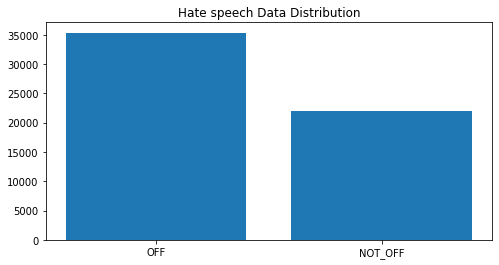

In [5]:
val_count = df.off.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Hate speech Data Distribution")

In [6]:
import random
random_idx_list = [random.randint(1,len(df.tweets)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,tweets,off
15644,في الزواج : هي بايرة أما هو فأعزب,OFF
54755,مارسيل غانم عبارة عن كلب عوائه ونباحه فارغ,OFF
44888,و هل هناك جاهلية اكثر من التي انتم فيها الان ؟...,OFF
57015,RT @USER: يا حلاوه يا شوكلاته يا جلبيي❤😂 URL,NOT_OFF
43326,م أنت إلا مجرم ولص وسارق كمثل باقي حلفاء بشارو...,OFF
19234,عندما كانت سنجار بيد التنظيم لم يجروا لا الحشد...,OFF
4298,@USER الله يبارك فيك حبييييبي علي .. اللّهم آم...,NOT_OFF
51711,مافي حي بينطر حي يمكن انت تموت قبل شو بعرفك,NOT_OFF
11599,اللهم أسعد قلبى وقلب من احبهم فيك و المسلمين ا...,OFF
55464,لما خالد الغندور الـي امه شرموطه بيساند الناد...,OFF


#Text Preprocessing¶


In [7]:
import gensim

In [8]:
# load the model
modelwv = gensim.models.Word2Vec.load('/content/drive/MyDrive/MasterThesis/Code/Offensive2020-SharedTask-Dataset/WE/Twt-CBOW/Twt-CBOW')

In [9]:
text_cleaning_re = "[a-zA-Z]|\d+|[٠١٢٣٤٥٦٧٨٩]|[.#،<>/@,\\-_”“٪ًَ]"
# stop_words = stopwords.words('arabic')
# stop_words=[
#           'من','في'
# ]
def preprocess(text):
  
  #remove tashkeel
  p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
  text = re.sub(p_tashkeel,"", str(text))
  # text = text.replace('وو', 'و')
  # text = text.replace('يي', 'ي')
  # text = text.replace('اا', 'ا')
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  #remove longation
  text = re.sub(r'(.)\1+', r'\1\1', str(text)) 
  text = re.sub("[إأآا]", "ا", str(text))
  text = re.sub("ى", "ي", str(text))
  text = re.sub(r'\\', '', str(text))
  # text = re.sub("ئ", "ء", text)
  text = re.sub("ة", "ه", str(text))
  # for i in range(0, len(search)):
  #       text = text.replace(search[i], replace[i])
  
   #trim    
  # text = text.strip()

  tokens = []
  for token in text.split():
    # if token not in stop_words:
      tokens.append(token)
  return " ".join(tokens)

In [10]:
# stop_words

In [11]:
preprocess(' مشكووووووووور 156562سٌلمُ@#')

'مشكوور سلم'

In [12]:
word = preprocess(u'حقير')

# find and print the most similar terms to a word
most_similar = modelwv.wv.most_similar( word )
for term, score in most_similar:
	print(term, score)

سافل 0.6879982352256775
خسيس 0.6644033193588257
قذر 0.6214959621429443
منحط 0.6129060983657837
وقح 0.6018147468566895
غبي 0.5982157588005066
وحقير 0.5942843556404114
وسافل 0.5851724743843079
ومنحط 0.5787683725357056
جبان 0.5700664520263672


In [13]:
word_vector = modelwv.wv[ word ]
# word_vector

In [14]:
df.tweets = df.tweets.apply(lambda x: preprocess(x))
df.tweets[:10]
# df.head(10)

0    في حاجات مينفعش نلفت نظركوا ليها زي الاصول كده...
1    : وعيون تنادينا تحايل فينا و نقول يا عيونه يا ...
2    يا بلادي يا ام البلاد يا بلادي بحبك يا مصر بحب...
3    : يا رب يا قوي يا معين مدني بالقوه و العون و ا...
4                    : رحمك الله يا صدام يا بطل ومقدام
5    يا جابر يا بنجرجي يا مرتزق يا حثاله الحمدين يا...
6    : يا انـت يا بعضــي وكلــي وذاتــي يا لـون الف...
7                    كحل عينك يا منحط يا وضيع يا متخلف
8    لعنه الله عليك يا النذل يا الواطي ولعنه الله ع...
9    يا قلب يا احد الاصغرين كيف اتسعت لهذا الوجود ؟...
Name: tweets, dtype: object

In [52]:
# #Not Offensive Words
# from wordcloud_fa import WordCloudFa


# plt.figure(figsize = (20,20)) 
# wc=WordCloudFa(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.off == 'NOT_OFF'].tweets))

# image = wc.to_image()
# image.save('wordcloud.png')
# plt.imshow(wc , interpolation = 'bilinear')

In [53]:
# plt.figure(figsize = (20,20)) 
# wc=WordCloudFa(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.off == 'OFF'].tweets))
# image = wc.to_image()
# image.save('wordcloudoff.png')
# plt.imshow(wc , interpolation = 'bilinear')

# Train and Test Split

In [15]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 10000
MAX_SEQUENCE_LENGTH = 30


In [16]:
# train_data, val_data = train_test_split(df, test_size=1-TRAIN_SIZE,
#                                          random_state=7) # Splits Dataset into Training and Testing set


# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.tweets,df.off, test_size = 0.10, random_state = 42, stratify=df.off)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.10, random_state = 42, stratify=y_train)

print("Train Data size:", len(X_train))
print("Test Data size", len(X_test))
print("Val Data size", len(X_val))
# print(X_train.shape)
# print()

Train Data size: 46491
Test Data size 5740
Val Data size 5166


In [17]:
y_test.head()

46711        OFF
30038    NOT_OFF
23602    NOT_OFF
47429        OFF
20672        OFF
Name: off, dtype: object

In [18]:
X_train.head(10)


35962    اللهم اجعله يبتلع اي ايران ومن يحبها اللهم دمر...
4072     ابو كرتونه يا واطيه يا لاجئه يا صايعه هجبلك مر...
46162    عاده المتخلفين عقليا وجسديا وتاريخيا وولما ستح...
2282     بعد ما انيكك وقافي و ترتعشي و تنزلي و زبي بكسك...
34171    جبهه النصره و مجموعات اخري!!؟ طريقه الخبر تخيف...
26650    امريكا اقتنعت بدوله كردستان ودوله العراق السني...
47679    سيتذوق النصيريه طعم حذاء جنود الدوله الاسلاميه...
8372     محمد بن سلمان يبهر العالم واذا ابهر اليهود وال...
56687                          يا اجازه يا حلوه عجلي 🚶🏻‍♂️
16370                       هو صلاح واخد رامي يبص ع الحريم
Name: tweets, dtype: object

In [19]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
# tokenizer.fit_on_texts(X_test)

tokenizer.fit_on_texts(X_val)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)


Vocabulary Size : 127755


In [20]:
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(tokenizer.texts_to_sequences(X_train),
                        maxlen = MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(tokenizer.texts_to_sequences(X_val),
                       maxlen = MAX_SEQUENCE_LENGTH)

X_test=pad_sequences(tokenizer.texts_to_sequences(X_test),maxlen=MAX_SEQUENCE_LENGTH)
print("Training X Shape:",X_train.shape)
print("validation X Shape:",X_val.shape)
print("Testing X Shape:",X_test.shape)


Training X Shape: (46491, 30)
validation X Shape: (5166, 30)
Testing X Shape: (5740, 30)


In [21]:
labels = y_train.unique().tolist()
labels

['OFF', 'NOT_OFF']

In [22]:
encoder = LabelEncoder()
encoder.fit(y_train.to_list())
# encoder.fit(y_val.to_list())
# encoder.fit(y_test.to_list())

y_train = encoder.transform(y_train.to_list())
y_val = encoder.transform(y_val.to_list())
Y_test = encoder.transform(y_test.to_list())

y_train = y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", Y_test.shape)
print("y_val shape:", y_val.shape)


y_train shape: (46491, 1)
y_test shape: (5740, 1)
y_val shape: (5166, 1)


In [23]:
print(Y_test[:5])
print(y_test.head())

[[1]
 [0]
 [0]
 [1]
 [1]]
46711        OFF
30038    NOT_OFF
23602    NOT_OFF
47429        OFF
20672        OFF
Name: off, dtype: object


# Word embedding

In [24]:
# !wget http://mazajak.inf.ed.ac.uk:8000/get_sg_250

# !wget https://www.dropbox.com/s/ce9phmmawoe1ure/Twt-CBOW.zip

In [64]:
# !unzip Twt-CBOW.zip
# !gunzip -k get_sg_250.bin

In [65]:
# !ls

In [45]:
# GLOVE_EMB = '/content/drive/MyDrive/MasterThesis/Code/Offensive2020-SharedTask-Dataset/WE/Twt-CBOW/Twt-CBOW'
EMBEDDING_DIM = 300
LR = 1e-4
# LR = 0.01
BATCH_SIZE = 1024
EPOCHS = 50
# MODEL_PATH = '/content/best_model.hdf5'

In [46]:
# load the model
# modelwv = gensim.models.Word2Vec.load('/content/drive/MyDrive/MasterThesis/Code/Offensive2020-SharedTask-Dataset/WE/Twt-CBOW/Twt-CBOW')

In [47]:
# embeddings_index = {}

# f = open(GLOVE_EMB)
# for line in f:
#   values = line.split()
#   word = value = values[0]
#   coefs = np.asarray(values[1:], dtype='float32')
#   embeddings_index[word] = coefs
# f.close()

# print('Found %s word vectors.' %len(embeddings_index))

# -------------------------------------------------------- #

# embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
# for word, i in word_index.items():
#   embedding_vector = embeddings_index.get(word)
#   if embedding_vector is not None:
#     embedding_matrix[i] = embedding_vector



In [48]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    if word in modelwv.wv.vocab:
      embedding_vector = modelwv[word]
    else:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [49]:
print(embedding_matrix.shape)
# EMBEDDING_DIM=300


(127755, 300)


In [50]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

#Model Training - LSTM


In [51]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from keras.layers import Dropout,Embedding,GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Model


In [109]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')


# embedding_sequences = embedding_layer(sequence_input)
# x = SpatialDropout1D(0.2)(embedding_sequences)
# # x = Conv1D(64, 5, activation='relu')(x)
# # x = Bidirectional(LSTM(64, dropout=0.2))(x)
# x = Bidirectional(LSTM(64, return_sequences=True))(x)
# x = Bidirectional(LSTM(64))(x)
# # x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)
# # x = Dense(512, activation='relu')(x)
# outputs = Dense(1, activation='sigmoid')(x)
# model = tf.keras.Model(sequence_input, outputs)

# sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype="int64")
# embedded_sequences = embedding_layer(sequence_input)
# x = Conv1D(128, 5, activation="relu")(embedded_sequences)
# x = MaxPooling1D(5)(x)
# x = Conv1D(128, 5, activation="relu")(x)
# # x = MaxPooling1D(5)(x)
# # x = Conv1D(128, 5, activation="relu")(x)
# x = GlobalMaxPooling1D()(x)
# x = Dense(128, activation="relu")(x)
# x = Dropout(0.5)(x)
# preds = Dense(1, activation='sigmoid')(x)
# model = tf.keras.Model(sequence_input, preds)




# Add 2 bidirectional LSTMs
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
# x = layers.Bidirectional(layers.LSTM(64))(x)

# Text classification Using RNN 

# embedding_sequences = embedding_layer(sequence_input)
# x=Bidirectional(LSTM(128,  return_sequences=True))(embedding_sequences)
# x=  tf.keras.layers.Bidirectional(LSTM(64))(x)
# x=    tf.keras.layers.Dense(64, activation='relu')(x)
# x=    tf.keras.layers.Dropout(0.5)(x)
# x=    tf.keras.layers.Dense(1)(x)

outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

ValueError: ignored

In [90]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
# Adam(learning_rate=LR)
model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
# ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
#                                      min_lr = 0.01,
#                                      monitor = 'val_loss',
#                                      verbose = 1)

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)
]

In [91]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(X_val, y_val), callbacks=my_callbacks)

Epoch 1/50
46/46 [==============================] - 8s 86ms/step - loss: 0.6910 - accuracy: 0.5404 - val_loss: 0.6717 - val_accuracy: 0.6167
Epoch 2/50
46/46 [==============================] - 3s 61ms/step - loss: 0.6668 - accuracy: 0.6147 - val_loss: 0.6526 - val_accuracy: 0.6202
Epoch 3/50
46/46 [==============================] - 3s 61ms/step - loss: 0.6550 - accuracy: 0.6207 - val_loss: 0.6487 - val_accuracy: 0.6280
Epoch 4/50
46/46 [==============================] - 3s 61ms/step - loss: 0.6486 - accuracy: 0.6283 - val_loss: 0.6454 - val_accuracy: 0.6307
Epoch 5/50
46/46 [==============================] - 3s 72ms/step - loss: 0.6406 - accuracy: 0.6389 - val_loss: 0.6442 - val_accuracy: 0.6328
Epoch 6/50
46/46 [==============================] - 3s 61ms/step - loss: 0.6355 - accuracy: 0.6400 - val_loss: 0.6432 - val_accuracy: 0.6326
Epoch 7/50
46/46 [==============================] - 3s 62ms/step - loss: 0.6289 - accuracy: 0.6445 - val_loss: 0.6434 - val_accuracy: 0.6250
Epoch 8/50
46

In [92]:
scores = model.evaluate(X_train,y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print(y_train)

accuracy: 68.56%


In [93]:
# evaluate the model
scorestest = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scorestest[1]*100))

accuracy: 63.75%


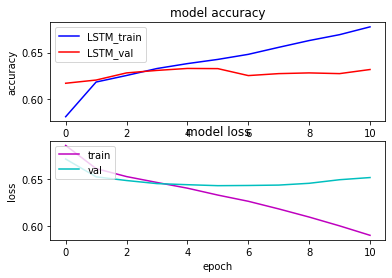

In [94]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [95]:
def decode_sentiment(score):
    return "OFF" if score>=0.5 else "NOT_OFF"


scores = model.predict(X_test, verbose=1, batch_size=100)
y_pred_1d = [decode_sentiment(score) for score in scores]
print(y_pred_1d[:10])
print(y_test[:10].to_list())
# scores
# print(y_test[10:20])
# model.predict_proba(X_test, verbose=1, batch_size=100)[0:10, 1]
# print('Count of off and not off in test dataset : \n',y_test.value_counts())
print('======================')
# scores>0.8

58/58 [==============================] - 1s 5ms/step
['OFF', 'OFF', 'OFF', 'OFF', 'OFF', 'OFF', 'OFF', 'OFF', 'OFF', 'OFF']
['OFF', 'NOT_OFF', 'NOT_OFF', 'OFF', 'OFF', 'NOT_OFF', 'OFF', 'NOT_OFF', 'OFF', 'NOT_OFF']


In [96]:
# y_pred = np.round(scores)
# y_pred

In [97]:
# cpred = float(sum(y_pred == y_test))
# cm = confusion_matrix(y_test, y_pred.to_list())
# cpred = float(sum(y_pred == y_test)[0])
# print("\n-> Correct predictions:", cpred)



# print(y_test)

# y_preds = lstm_model.predict(x_test)
#     y_pred = np.round(y_preds)
#     cpred = float(sum(y_pred == y_test)[0])
#     cm = confusion_matrix(y_test.argmax(1), y_pred.argmax(1))
#     print("\n-> Correct predictions:", cpred)
#     print("\n-> Total number of test examples:", len(y_test))
#     print("\n-> Accuracy of model: ", cpred/float(len(y_test)))
#     print("\n-> Confusion for Dataset",n,": ", cm)

In [98]:
# # y_df = pd.DataFrame(y)
# y_hate = np.array(df.off)
# y_hate.shape
# y_hate[10]
# # y_offensive = np.array(y_df[1])

#Confusion Matrix¶


In [99]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [100]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)


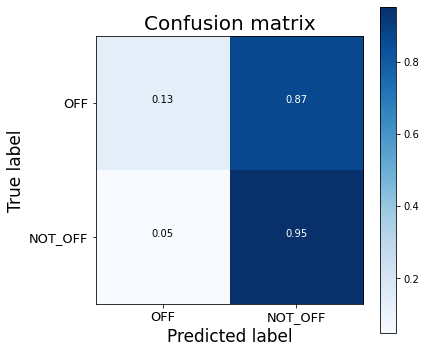

In [101]:
cnf_matrix = confusion_matrix(y_test.to_list(),y_pred_1d )
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=y_test.unique(), title="Confusion matrix")
plt.show()

In [102]:
#Classification Scores

# print(classification_report(y_test, y_classes))
# print(classification_report(list(Y_test), y_pred_1d))
print(classification_report(list(y_test), y_pred_1d))


              precision    recall  f1-score   support

     NOT_OFF       0.63      0.13      0.22      2206
         OFF       0.64      0.95      0.76      3534

    accuracy                           0.64      5740
   macro avg       0.64      0.54      0.49      5740
weighted avg       0.64      0.64      0.56      5740



In [103]:
# filepath="weights_base.best.hdf5"
# y_pred = model.predict(x_test,batch_size=1024,verbose=1)

In [104]:
# submission = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv')
# submission[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]] = y_pred

In [105]:
# from tensorflow.keras import layers
# max_features = 20000
# embedding_dim = 128
# sequence_length = 500
# # A integer input for vocab indices.
# inputs = tf.keras.Input(shape=(None,), dtype="int64")

# # Next, we add a layer to map those vocab indices into a space of dimensionality
# # 'embedding_dim'.
# x = layers.Embedding(max_features, embedding_dim)(inputs)
# x = layers.Dropout(0.5)(x)

# # Conv1D + global max pooling
# x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
# x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
# x = layers.GlobalMaxPooling1D()(x)

# # We add a vanilla hidden layer:
# x = layers.Dense(128, activation="relu")(x)
# x = layers.Dropout(0.5)(x)

# # We project onto a single unit output layer, and squash it with a sigmoid:
# predictions = layers.Dense(1, activation="sigmoid", name="predictions")(x)

# model = tf.keras.Model(inputs, predictions)

# # Compile the model with binary crossentropy loss and an adam optimizer.
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [106]:
# epochs = 20

# # Fit the model using the train and test datasets.
# model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=epochs)

In [107]:
# from sklearn.metrics import roc_curve
# from matplotlib import pyplot
# from numpy import sqrt
# from numpy import argmax

# # predict probabilities
# yhat = model.predict(X_test,batch_size=100)
# # yhat = model.predict_proba(X_test)
# # keep probabilities for the positive outcome only
# yhat = yhat[:, 0]
# # calculate roc curves
# fpr, tpr, thresholds = roc_curve(Y_test, yhat)
# # calculate the g-mean for each threshold
# gmeans = sqrt(tpr * (1-fpr))
# # locate the index of the largest g-mean
# ix = argmax(gmeans)
# print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# # plot the roc curve for the model
# pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
# pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# # axis labels
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# pyplot.legend()
# # show the plot
# pyplot.show()

In [108]:
# MAX_SEQUENCE_LENGTH=80
# totest=["انت حقير جدا "]
# totest=[i.split(" ") for i in totest]
# print(totest)
# Xnew=np.array(tokenizer.texts_to_sequences(totest))
# Xnew = pad_sequences(Xnew, maxlen=MAX_SEQUENCE_LENGTH,padding='post')
# ynew = model.predict(Xnew)

# result=np.argmax(ynew,axis=1)
# for k,v in label_index.items():
#   if v==result:
#     print(k)